In [1]:
import pandas as pd
data=pd.read_csv("diabetes.csv")
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [24]:
x=data.drop("Outcome",axis=1)
x=x.replace(0,x.mean())
print(x)
y=data["Outcome"]
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0      35.000000   79.799479  33.6   
1       1.000000     85.0           66.0      29.000000   79.799479  26.6   
2       8.000000    183.0           64.0      20.536458   79.799479  23.3   
3       1.000000     89.0           66.0      23.000000   94.000000  28.1   
4       3.845052    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0      48.000000  180.000000  32.9   
764     2.000000    122.0           70.0      27.000000   79.799479  36.8   
765     5.000000    121.0           72.0      23.000000  112.000000  26.2   
766     1.000000    126.0           60.0      20.536458   79.799479  30.1   
767     1.000000     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [4]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit_transform(x)
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [5]:
#or
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(x)
print(data_scaled)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train)

[[-0.54791859 -1.15469351 -3.57259724 ... -4.06047387 -0.50700636
  -1.04154944]
 [ 1.53084665 -0.27837344  0.66661825 ... -0.48135115  2.44666971
   1.4259954 ]
 [-0.84488505  0.56664949 -1.19450074 ... -0.41789153  0.55003518
  -0.95646168]
 ...
 [ 1.82781311 -0.62264204  0.87340925 ...  1.72704372  2.00573238
   0.40494237]
 [-1.14185152  0.62924378 -3.57259724 ...  1.32090213 -0.8059981
  -0.36084741]
 [-1.14185152  0.12848945  1.39038675 ... -1.20479085 -0.63385134
  -1.04154944]]


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(16,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=50,batch_size=32)
test_loss,test_acccuracy=model.evaluate(x_test,y_test)

print("Test Loss:",test_loss)
print("Test Accuracy:",test_acccuracy)

predictions=model.predict(x_test)
predictions_data=pd.DataFrame({'Actual':y_test.values,'Predicted':predictions.flatten()})
#converting predicted values 1s
predictions_data['Predicted']=predictions_data['Predicted'].apply(lambda x:1 if x>0.5 else 0)
print(predictions_data)
#accuracy check
predictions_data['correct']=predictions_data['Actual']==predictions_data['Predicted']
#count of the each distinct value
counts=predictions_data['correct'].value_counts()
print(counts)
#also accuracy
accuracy=counts[True]/(counts[True]+counts[False])
print("Accuracy:",accuracy)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9286 - loss: 0.1919
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9457 - loss: 0.1551 
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9482 - loss: 0.1574 
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9530 - loss: 0.1502 
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9319 - loss: 0.1783 
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9558 - loss: 0.1456 
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9467 - loss: 0.1367 
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9330 - loss: 0.1615 
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9468 - loss: 0.1442 
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9472 - loss: 0.1483 
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9469 - loss: 0.1465 
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

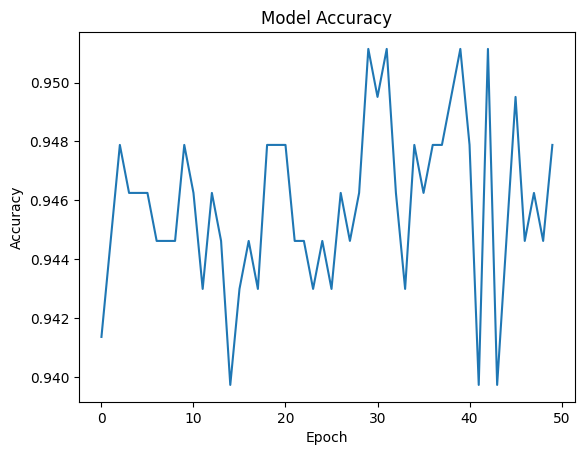

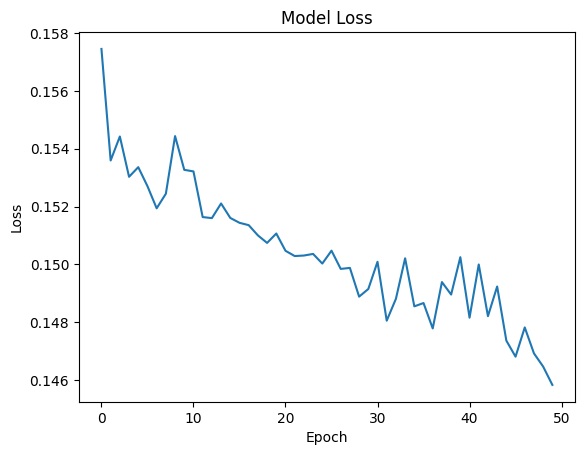

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
